## Introduction

Seahorse is a python module with different aims :
- Wrap both matplotlib, pandas and seaborn draw functions into a same object
- Relieve the user of the ax and data management, making the code cleaner and easier to write
- Extend these libraries by adding new plotting functions
- Add functions to make aesthetic more easier

Before starting using this module, I highly encourage user to read [basic tutorials](https://matplotlib.org/tutorials/index.html) of how matplotlib works, since it's not *that* trivial and even a slight understanding will help you a lot.

In this module I split draw functions and resulting graph objects in two main categories :
- The *simple* graphs which contains only one ax
- The *complexe* graphs which contains more than one ax such as seaborn clustermap or seahorse pyupset

This notebook only covers simple graphs.

### Graph object and seahorse constants

By default, seahorse is configured with different paramaters allowing to get out-of-the-box reliable and consistant output. First, seahorse use the `FigureCanvasAgg` backend. While this backend is more reliable when figures are saved, it did not allow to show the figure. A `SHOWMODE` constant is therefore available to ignore this behavior. Moreover, a default figure size is used (20, 11.25 inches) when `SHOWMODE` is set to `FALSE` (default).

The more basic seahorse object is `Graph`. Graph is mostly a wrapper for modules and aesthetic function, managing ax and data for you. Access to modules plotting function go through `Graph` attributes :
- ax : The `ax` attribute and therefore matplotlib
- df : The `data` attribute which if it's a pandas dataframe or series, can be used with pandas `plot`
- sns : The seaborn functions
- shs : The seahorse functions

In [1]:
from seahorse import Graph
from seahorse import gwrap, constants

constants.SHOWMODE = True

import numpy as np
import pandas as pd

Matplotlib venn package not found (optional)
Download command line : pip install matplotlib-venn


In [2]:
df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()

df.head(5)

,A,B,C,D
2000-01-01,-0.146420,-2.058972,-1.404850,1.776697
2000-01-02,-1.604002,-2.523802,-2.539801,1.547557
2000-01-03,-1.454609,-2.555031,-2.815185,3.496102
2000-01-04,-2.370777,-4.007364,-2.203109,2.656298
2000-01-05,0.920977,-5.290962,-1.555700,1.271041


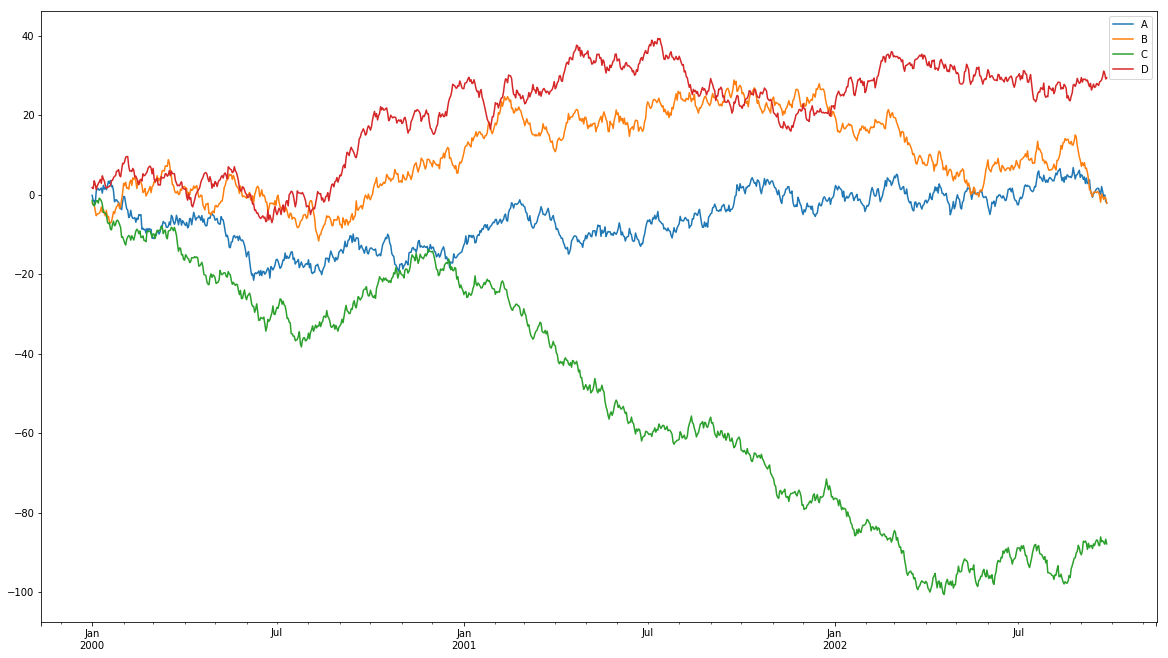

In [3]:
graph = Graph(df)
graph.df.plot()
graph.show()

While for df and ax, it's just and access to the attribute, for seaborn this process call the seaborn function and automaticaly provide the ax and data argument to the function called.

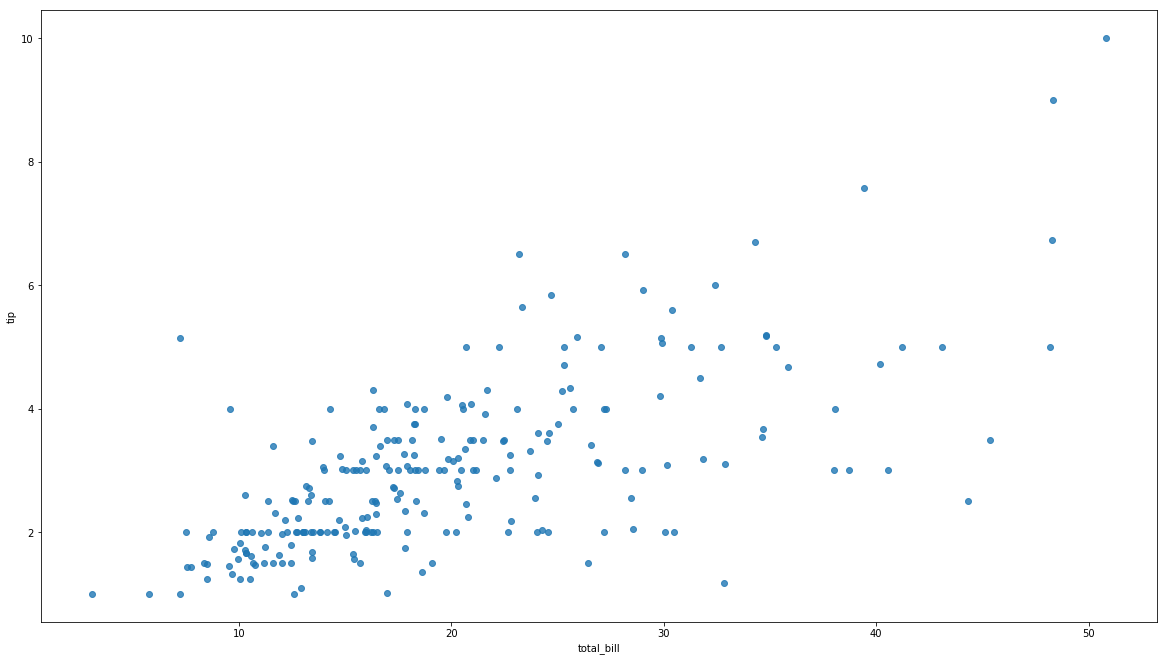

In [4]:
df = gwrap.sns.load_dataset("tips")
graph = Graph(df)
graph.sns.regplot("total_bill", "tip", fit_reg=False)
graph.show()

This process is similar for seahorse plotting function working with only one ax

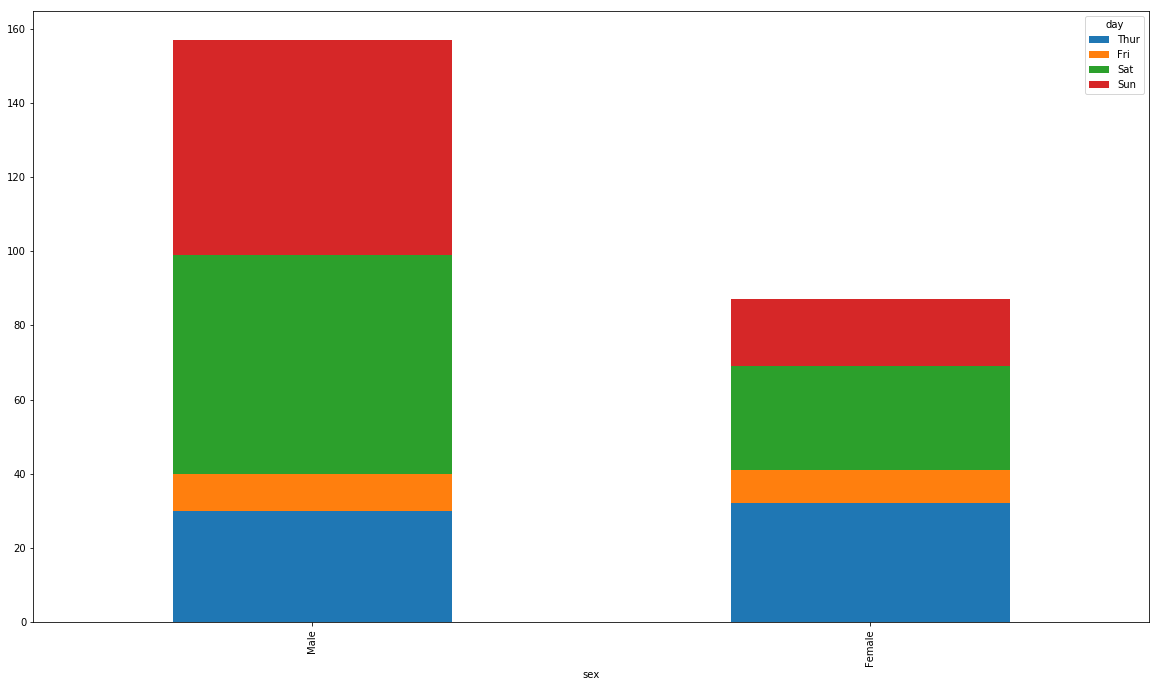

In [5]:
df = gwrap.sns.load_dataset("tips")
df = df.groupby(["sex", "day"]).size().rename("#Observations").reset_index()

graph = Graph(df)
graph.shs.stacked_barplot(x="sex", y="#Observations", hue="day")
graph.show()

`Graph` object contains several aesthetic function and inherit from a `Fig` object, allowing to easily manage both the figure and the ax properties.

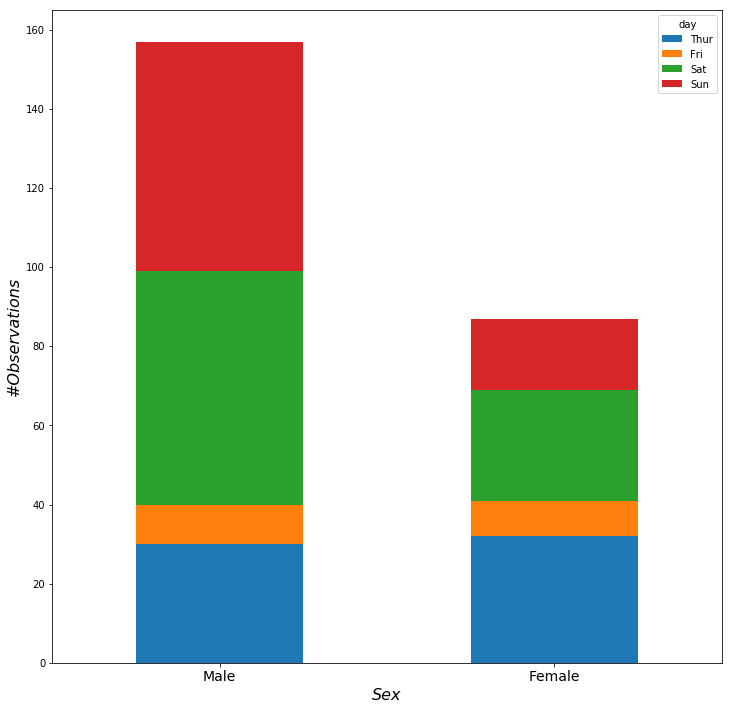

In [6]:
graph = Graph(df)
graph.shs.stacked_barplot(x="sex", y="#Observations", hue="day")

graph.set_labels("Sex", "#Observations", size=16, style="oblique")
graph.apply_xticklabels(rotation=0, size=14)
graph.set_square()

graph.show()